In [140]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from collections import Counter
from nltk.util import ngrams
import string
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from pprint import pprint
from wordcloud import WordCloud

In [241]:
import requests

# URL of the text file
url =  "https://raw.githubusercontent.com/kkevinliu01/ECOM90025-Project/refs/heads/main/MonetaryPolicyStatements.txt"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Get the content of the text file
    text_content = response.text
    print(text_content)
else:
    print(f"Failed to retrieve file. Status code: {response.status_code}")

Given current and prospective developments in the Australian economy, including the improved outlook for inflation, the Reserve Bank and the Government believe that a further easing in monetary policy is appropriate.
To this end, the Bank will be operating in the domestic money market this morning to reduce cash rates by a further 1 percentage point, to around 12 per cent. It is expected that this reduction in cash rates will flow promptly and fully into banks' indicator lending rates.
The objectives of monetary policy continue to be to help lower inflation over the medium-term while seeking to avoid damaging swings in economic activity. Today's reduction – which brings the total reduction in cash rates in 1990 to 6 percentage points – is consistent with those objectives.
Inflationary pressures are clearly abating, with practically all indicators pointing to smaller increases in prices and wages than we have seen in a long time. This has been reflected in the financial markets, where y

In [ ]:
# Download necessary resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

In [ ]:
# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

In [ ]:
# Helper function to convert NLTK POS tags to WordNet POS tags
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [ ]:
# Function to preprocess text: tokenization, stopword removal, and lemmatization
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text.lower())
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    
    # POS tagging
    pos_tags = pos_tag(tokens)
    
    # Lemmatize tokens based on POS tags
    lemmatized_tokens = [lemmatizer.lemmatize(token, get_wordnet_pos(pos)) for token, pos in pos_tags]
    
    return lemmatized_tokens

In [239]:
documents = [
    text_content
]

In [ ]:
# Preprocess each document
processed_docs = [preprocess_text(doc) for doc in documents]

# Create a dictionary and convert documents to BoW format
dictionary = corpora.Dictionary(processed_docs)
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

# Train the LDA model
lda_model = LdaModel(bow_corpus, num_topics=6, id2word=dictionary, passes=10)

# Print the topics found by LDA
pprint(lda_model.print_topics())

In [ ]:
# Function to preprocess the text and remove punctuation
def preprocess_text(text):
    # Tokenize the text into words
    tokens = word_tokenize(text.lower())
    
    # Remove punctuation
    tokens = [word for word in tokens if word.isalpha()]
    
    return tokens

In [ ]:
# Function to find the most common n-grams
def find_common_phrases(corpus, n=2, top_k=10):
    # Combine all documents into a single text
    combined_text = " ".join(corpus)
    
    # Preprocess the combined text
    tokens = preprocess_text(combined_text)
    
    # Generate n-grams
    n_grams = ngrams(tokens, n)
    
    # Count the frequency of each n-gram
    ngram_freq = Counter(n_grams)
    
    # Return the top_k most common n-grams
    return ngram_freq.most_common(top_k)

In [243]:
documents = [
    text_content
]

In [ ]:
# Find the most common bigrams (2-word phrases)
common_bigrams = find_common_phrases(documents, n=2, top_k=30)
print("Most common bigrams:", common_bigrams)

# Find the most common trigrams (3-word phrases)
common_trigrams = find_common_phrases(documents, n=3, top_k=30)
print("Most common trigrams:", common_trigrams)

In [ ]:
# Function to preprocess the text: tokenization and stopword removal
def preprocess_text(text):
    # Tokenize the text into words
    tokens = word_tokenize(text.lower())
    
    # Remove punctuation and stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    
    return ' '.join(tokens)

# Function to generate and display a word cloud
def generate_word_cloud(text):
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Turn off axis
    plt.show()

# text data

# Reading the entire file
with open('MonetaryPolicyStatements.rtf', 'r') as file:
    content = file.read()

documents = [
    content
]

# Combine the documents into a single string
combined_text = " ".join(documents)

# Preprocess the text
clean_text = preprocess_text(combined_text)

# Generate and display the word cloud
generate_word_cloud(clean_text)

In [84]:
def round_to_nearest_basis_point(cash_rate):
    # Round to the nearest 0.25 (25 basis points)
    return round(cash_rate[0] * 4) / 4

In [85]:
def cash_rate_change(new_rate, previous_rate):
    # Round both rates to the nearest 25 basis points
    new_rounded = round_to_nearest_basis_point(new_rate)
    previous_rounded = round_to_nearest_basis_point(previous_rate)
    
    # Determine if the cash rate increased, decreased, or stayed the same
    if new_rounded > previous_rounded:
        return "Increase"
    elif new_rounded < previous_rounded:
        return "Decrease"
    else:
        return "No Change"

In [185]:
url_df = "https://raw.githubusercontent.com/kkevinliu01/ECOM90025-Project/refs/heads/main/Data_NEW.csv"

In [187]:
data = pd.read_csv(url_df)

Target = 'Interest rate'

# Drop the 'Index' column as it isn't useful for modeling
X = data.drop(columns=['Date', Target])
y = data[Target]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [188]:
PredData = X.tail(1)
PredData

,Year-ended non-farm average earnings per hour growth,Year-ended non-farm labour productivity per hour growth,GDPGrowth,Year-ended household consumption growth,Year-ended dwelling investment growth,Year-ended business investment growth,Year-ended public demand growth,Year-ended domestic final demand growth,Changes in inventories,Changes in inventories contribution to GDP year-ended growth,...,Job vacancies_DELTA_12,Consumer Sentiment_LAG_1,Consumer Sentiment_DELTA_1,Consumer Sentiment_LAG_3,Consumer Sentiment_DELTA_3,Consumer Sentiment_LAG_6,Consumer Sentiment_DELTA_6,Consumer Sentiment_LAG_12,Consumer Sentiment_DELTA_12,IntRateChangeCoded
388,5.9,0.8,0.2,0.5,-3.0,2.2,3.6,1.5,986,0.6,...,-68.1,-15,0,-16,1,-16,1,-20,5,0


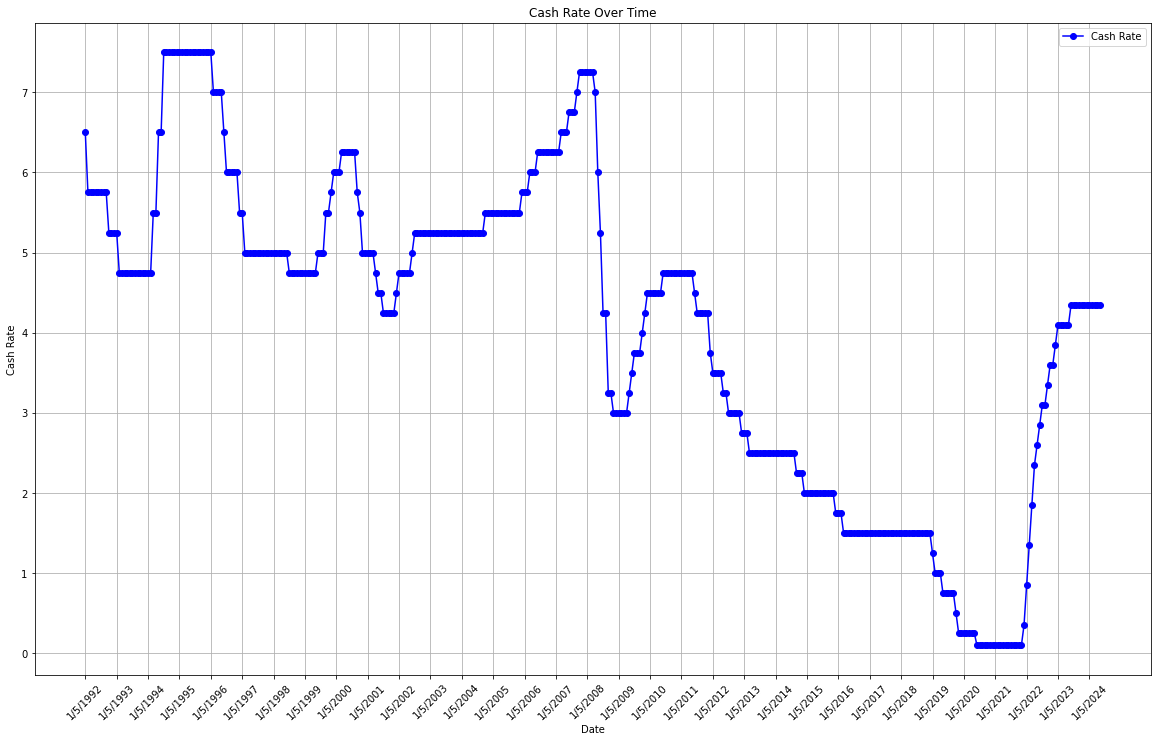

In [215]:
dates = pd.read_csv(url_df)['Date']

# Plot predictions vs actual values
plt.figure(figsize=(20, 12))
plt.plot(dates, y, label='Cash Rate', color='blue', marker='o')

# Show every 12th date as an x-tick
plt.xticks(dates[::12], rotation=45)

plt.title('Cash Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Cash Rate')
plt.legend()
plt.grid(True)
plt.show()

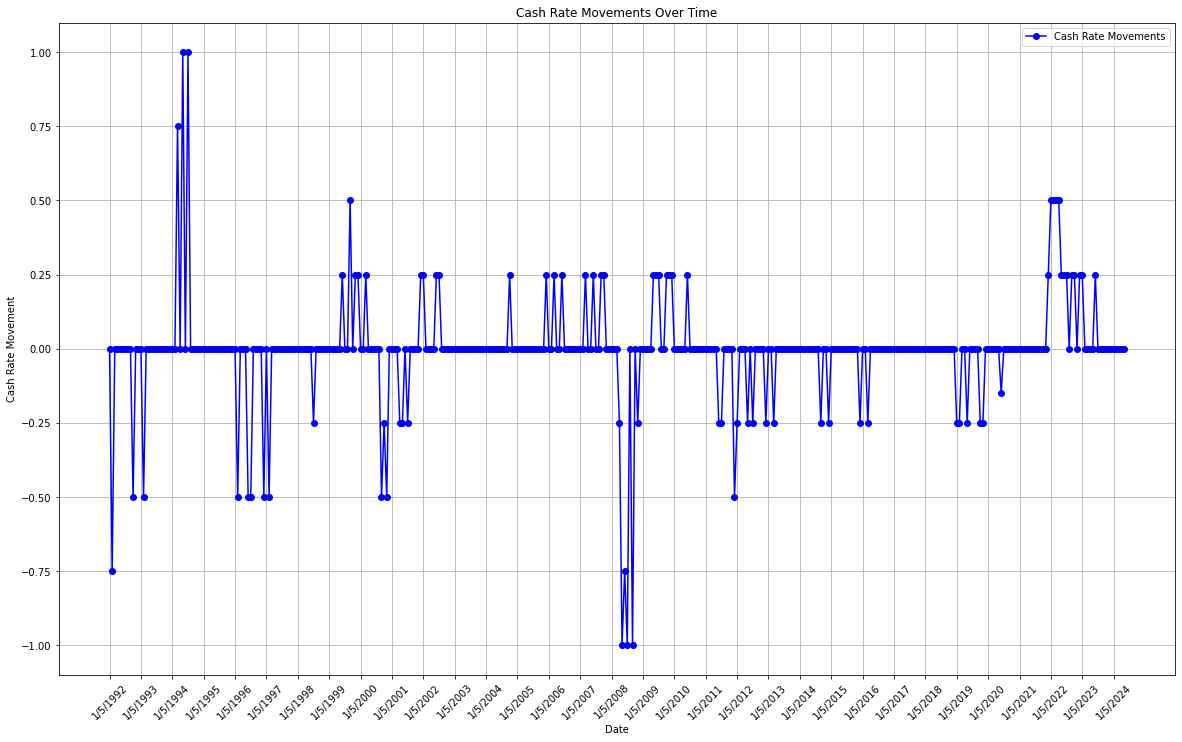

In [191]:
dates = pd.read_csv(url_df)['Date']
int_rate_changes = pd.read_csv(url_df)['IntRateChange']

# Plot predictions vs actual values
plt.figure(figsize=(20, 12))
plt.plot(dates, int_rate_changes, label='Cash Rate Movements', color='blue', marker='o')

# Show every 12th date as an x-tick
plt.xticks(dates[::12], rotation=45)

plt.title('Cash Rate Movements Over Time')
plt.xlabel('Date')
plt.ylabel('Cash Rate Movement')
plt.legend()
plt.grid(True)
plt.show()

In [192]:
# model = LinearRegression()
# model = RidgeCV()
# model = LassoCV()
model = ElasticNet()
# model = RandomForestRegressor()

In [193]:
def get_selected_features(X, y, alpha=0.1):
    # Fit Lasso model
    lasso = Lasso(alpha=alpha)
    lasso.fit(X, y)
    
    # Get the mask of non-zero coefficients
    mask = lasso.coef_ != 0
    
    # Get the selected feature names
    selected_features = X.columns[mask]
    
    return list(selected_features)

In [194]:
def get_selected_features_elastic_net(X, y, alpha=0.1, l1_ratio=0.5):
    # Fit Elastic Net model
    elastic_net = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
    elastic_net.fit(X, y)
    
    # Get the mask of non-zero coefficients
    mask = elastic_net.coef_ != 0
    
    # Get the selected feature names
    selected_features = X.columns[mask]
    
    return list(selected_features)

In [195]:
# Get selected features using Lasso
selected_features = get_selected_features(X, y, alpha=0.1)

# Display the selected features
print("Selected features:", selected_features)

Selected features: ['Year-ended dwelling investment growth', 'Year-ended business investment growth', 'Changes in inventories', 'Household saving ratio', 'Job vacancies', 'Private sector job vacancies', 'Interest rate_LAG_1', 'Job vacancies_LAG_6', 'Consumer Sentiment_LAG_3', 'Consumer Sentiment_LAG_6', 'Consumer Sentiment_DELTA_12']


In [196]:
# Get selected features using Elastic Net
selected_features = get_selected_features_elastic_net(X, y, alpha=0.01, l1_ratio=0.5)

# Display the selected features
print("Selected features:", selected_features)

Selected features: ['Year-ended household consumption growth', 'Year-ended dwelling investment growth', 'Year-ended business investment growth', 'Year-ended public demand growth', 'Changes in inventories', 'Household saving ratio', 'Quarterly inflation annualised', 'Quarterly inflation annualised target', 'Year-ended hours worked trend growth', 'Job vacancies', 'Private sector job vacancies', 'Interest rate_LAG_1', 'Interest rate_LAG_3', 'Interest rate_DELTA_3', 'Interest rate_LAG_6', 'Interest rate_DELTA_6', 'Interest rate_LAG_12', 'Interest rate_DELTA_12', 'IntRateChange_DELTA_1', 'IntRateChange_DELTA_3', 'Unemployment rate_LAG_12', 'Job vacancies_LAG_1', 'Job vacancies_DELTA_1', 'Job vacancies_LAG_3', 'Job vacancies_DELTA_3', 'Job vacancies_LAG_6', 'Job vacancies_DELTA_6', 'Job vacancies_LAG_12', 'Job vacancies_DELTA_12', 'Consumer Sentiment_LAG_1', 'Consumer Sentiment_LAG_3', 'Consumer Sentiment_DELTA_3', 'Consumer Sentiment_LAG_6', 'Consumer Sentiment_DELTA_6', 'Consumer Sentiment

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.006e+00, tolerance: 1.589e-01
  model = cd_fast.enet_coordinate_descent(


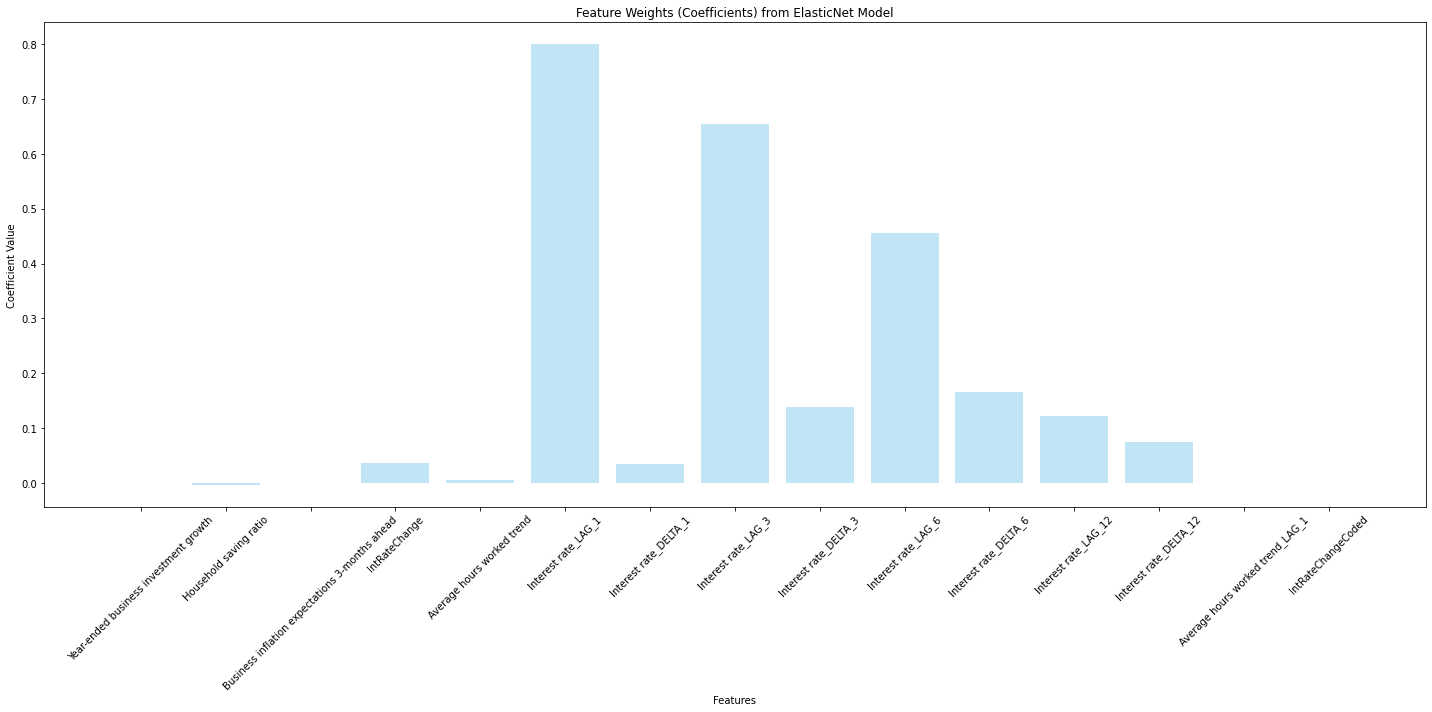

In [197]:
# Fit Elastic Net model
elastic_net = ElasticNet(alpha=0.01, l1_ratio=0.5)
elastic_net.fit(X_scaled, y)

# Get feature names and coefficients
feature_names = X.columns
coefficients = elastic_net.coef_

# Get the mask of non-zero coefficients
mask = elastic_net.coef_ != 0
    
# Get the selected feature names
selected_features = X.columns[mask]
selected_coefficents = coefficients[np.where(coefficients!=0)]

# Create a DataFrame for plotting
coef_df = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': selected_coefficents
})

# Plot the feature coefficients
plt.figure(figsize=(20, 10))
plt.bar(coef_df['Feature'], coef_df['Coefficient'], color = '#C1E5F5')
plt.title('Feature Weights (Coefficients) from ElasticNet Model')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [247]:
def baseline(df, target_column, n_train=5, n_test=2):
    errors = []
    actual = []
    predictions = []
    
    # Split the dataset into inputs (X) and the target (y)
    X = df.drop(target_column, axis=1)
    y = df[target_column]

    # Perform baseline case analysis
    for i in range(n_train, len(df) - n_test + 1):

        test_y = y.iloc[i:i+n_test]
        
        y_pred = [0]
        
        # Calculate and store the RMSE for this test set
        rmse = np.sqrt(mean_squared_error(test_y, y_pred))
        errors.append(rmse)

        actual.extend(test_y.values)  # Append actual values
        predictions.extend(y_pred)    # Append predicted values
        
    return actual, errors, predictions

In [248]:
# Model to use for walk-forward validation (BASELINE do nothing)

data = pd.read_csv(url_df)
data = data.drop(columns=['Date'])

# Complete baseline
actual, errors, predictions = baseline(data, target_column='IntRateChange', n_train=12, n_test=1)

# Print final RMSEs
print("Errors (RMSE) for each step:", errors)
print("Sum of RMSE:", sum(errors))

Errors (RMSE) for each step: [0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.75, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0, 0.5, 0.5, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.5, 0.0, 0.25, 0.25, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.25, 0.5, 0.0, 0.0, 0.0, 0.0, 0.25, 0.25, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.25, 0.25, 0.0, 0.0, 0.0, 0.0, 0.25, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.25, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.25, 0.0, 0.0, 0.25, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 1.0, 0.75, 1.0, 0.0, 1.0, 0

In [249]:
# Calculate the proportion of matching items
matches = sum(1 for x, y in zip(actual, predictions) if x == y)
proportion_match = matches / len(predictions)

# Display the result
print(f"Proportion of matching items: {proportion_match:.2f}")

Proportion of matching items: 0.80


In [266]:
def walk_forward_validation_lin_reg(df, target_column, n_train=5, n_test=2):
    errors = []
    actual = []
    predictions = []
    
    # Split the dataset into inputs (X) and the target (y)
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    
    # Initialize the scaler
    scaler = StandardScaler()

    # Perform walk-forward validation
    for i in range(n_train, len(df) - n_test + 1):
        # Train on the first 'n_train' samples
        train_X, train_y = X.iloc[i-n_train:i], y.iloc[i-n_train:i]
        
        # Test on the next 'n_test' samples
        test_X, test_y = X.iloc[i:i+n_test], y.iloc[i:i+n_test]
        
        # Step 1: Scale the training and testing data
        train_X_scaled = scaler.fit_transform(train_X)
        test_X_scaled = scaler.transform(test_X)
        
        # Step 2: Fit LinearRegression model
        model = LinearRegression()
        model.fit(train_X_scaled, train_y)
        
        # Step 3: Make predictions on the test set
        y_pred = [round_to_nearest_basis_point(model.predict(test_X_scaled))]
        
        # Step 4: Calculate and store the RMSE for this test set
        rmse = np.sqrt(mean_squared_error(test_y, y_pred))
        errors.append(rmse)

        # Step 5: Append actual and predicted values for plotting later
        actual.extend(test_y.values)  # Append actual values
        predictions.extend(y_pred)    # Append predicted values
        
        # Print the progress
        # print(f'Run {i-n_train+1}: Train size: {len(train_X)}, Test size: {len(test_X)}, RMSE: {rmse:.4f}')
    
    return actual, errors, predictions

In [278]:
# Model to use for walk-forward validation (BASELINE)
model = LinearRegression()

# Perform walk-forward validation
data = pd.read_csv(url_df)
data = data.drop(columns=['Date'])

# Run the walk-forward validation
actual, errors, predictions = walk_forward_validation_lin_reg(data, target_column='IntRateChange', n_train=12, n_test=1)

# Print final RMSEs
print("Errors (RMSE) for each step:", errors)
print("Sum of RMSE:", sum(errors))

Errors (RMSE) for each step: [0.25, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.75, 0.5, 0.25, 0.0, 0.25, 0.25, 0.5, 0.0, 0.25, 0.25, 0.0, 0.0, 0.5, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.25, 0.0, 0.25, 0.25, 0.0, 0.25, 0.25, 0.0, 0.0, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.25, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.5, 0.25, 0.0, 0.5, 0.25, 0.0, 0.0, 0.25, 0.0, 0.5, 0.25, 0.0, 0.25, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.25, 0.0, 0.0, 0.0, 0.0, 0.25, 0.25, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.25, 0.25, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.25, 0

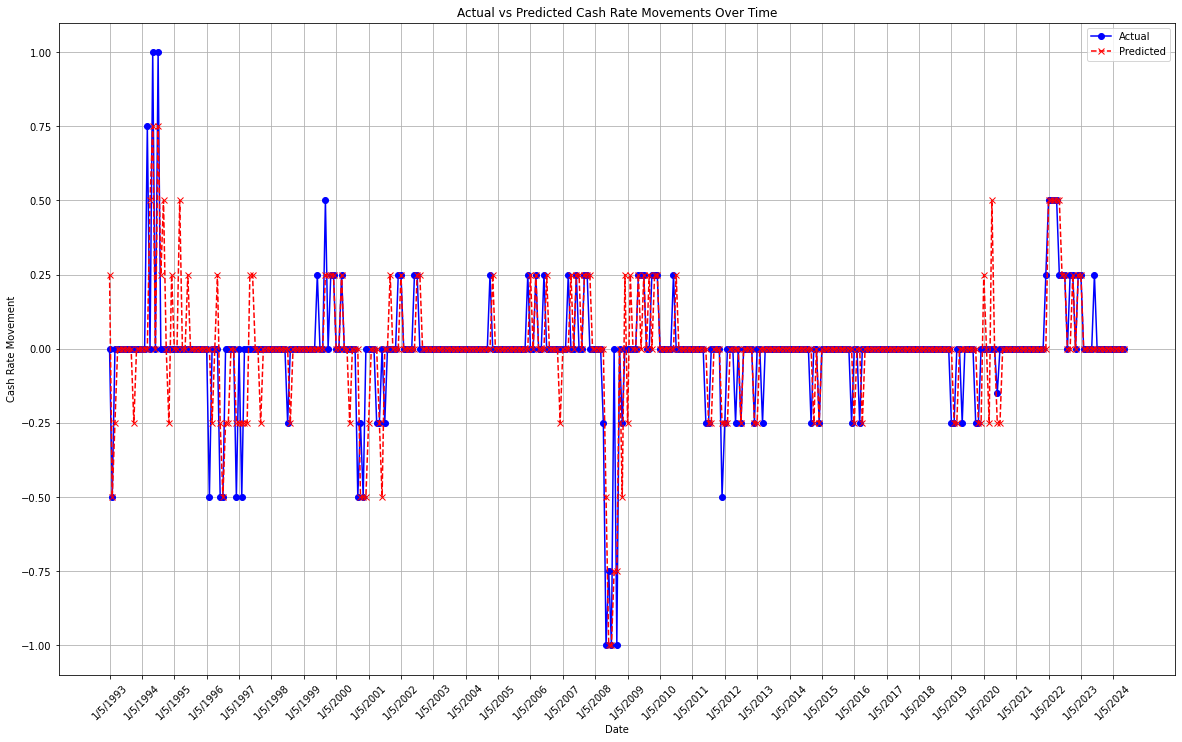

In [279]:
dates = pd.read_csv(url_df)['Date']

# Create a time index for plotting
time_index = dates[12:]

# Plot predictions vs actual values
plt.figure(figsize=(20, 12))
plt.plot(time_index, actual, label='Actual', color='blue', marker='o')
plt.plot(time_index, predictions, label='Predicted', color='red', linestyle='--', marker='x')

# Show every 12th date as an x-tick
plt.xticks(time_index[::12], rotation=45)

plt.title('Actual vs Predicted Cash Rate Movements Over Time')
plt.xlabel('Date')
plt.ylabel('Cash Rate Movement')
plt.legend()
plt.grid(True)
plt.show()

In [280]:
# Calculate the proportion of matching items
matches = sum(1 for x, y in zip(actual, predictions) if x == y)
proportion_match = matches / len(predictions)

# Display the result
print(f"Proportion of matching items: {proportion_match:.2f}")

Proportion of matching items: 0.75


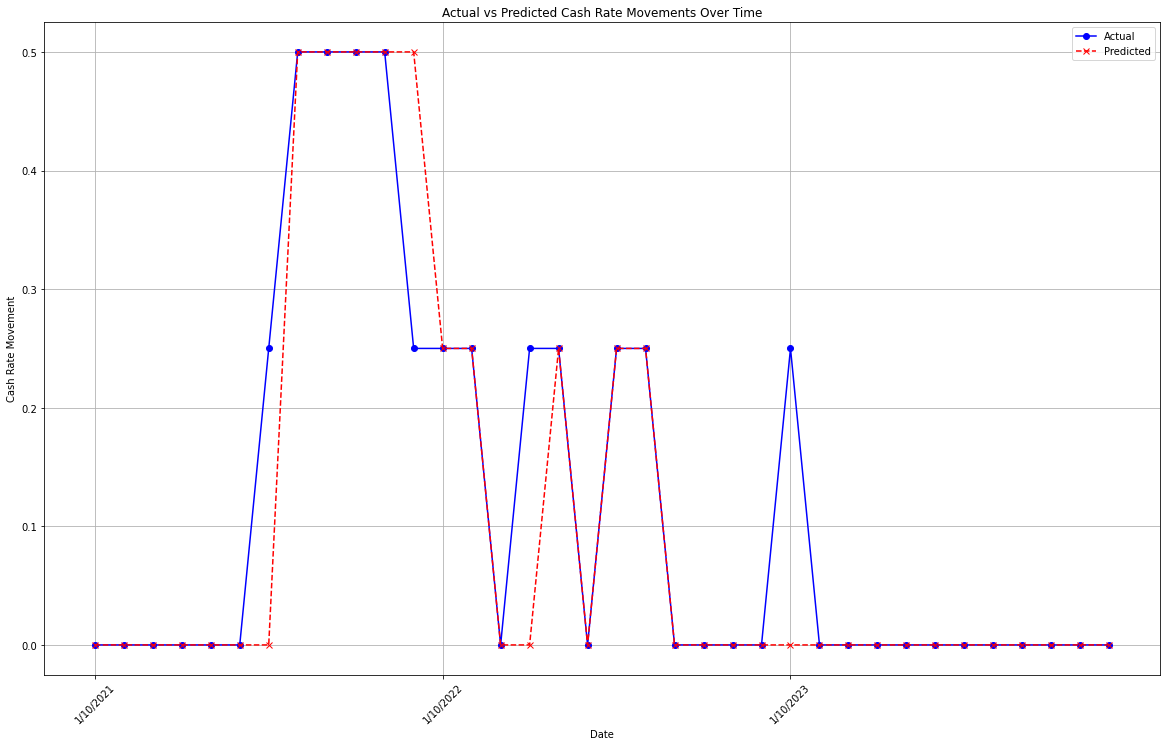

In [281]:
last_n = -36 # 3 years

dates = pd.read_csv(url_df)['Date']

# Create a time index for plotting
time_index = dates[12:]

# Create a time index for plotting
time_index = time_index[last_n:]

# Plot predictions vs actual values
plt.figure(figsize=(20, 12))
plt.plot(time_index, actual[last_n:], label='Actual', color='blue', marker='o')
plt.plot(time_index, predictions[last_n:], label='Predicted', color='red', linestyle='--', marker='x')

# Show every 12th date as an x-tick
plt.xticks(time_index[::12], rotation=45)

plt.title('Actual vs Predicted Cash Rate Movements Over Time')
plt.xlabel('Date')
plt.ylabel('Cash Rate Movement')
plt.legend()
plt.grid(True)
plt.show()

In [259]:
def walk_forward_validation_lasso(df, target_column, alpha=0.01, n_train=5, n_test=2):
    errors = []
    actual = []
    predictions = []
    
    # Split the dataset into inputs (X) and the target (y)
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    
    # Initialize the scaler
    scaler = StandardScaler()

    # Perform walk-forward validation
    for i in range(n_train, len(df) - n_test + 1):
        # Train on the first 'n_train' samples
        train_X, train_y = X.iloc[i-n_train:i], y.iloc[i-n_train:i]
        
        # Test on the next 'n_test' samples
        test_X, test_y = X.iloc[i:i+n_test], y.iloc[i:i+n_test]
        
        # Step 1: Scale the training and testing data
        train_X_scaled = scaler.fit_transform(train_X)
        test_X_scaled = scaler.transform(test_X)
        
        # Step 2: Fit Lasso model
        model = Lasso(alpha)
        model.fit(train_X_scaled, train_y)
        
        # Step 3: Make predictions on the test set
        y_pred = [round_to_nearest_basis_point(model.predict(test_X_scaled))]
        
        # Step 4: Calculate and store the RMSE for this test set
        rmse = np.sqrt(mean_squared_error(test_y, y_pred))
        errors.append(rmse)

        # Step 5: Append actual and predicted values for plotting later
        actual.extend(test_y.values)  # Append actual values
        predictions.extend(y_pred)    # Append predicted values
        
        # Print the progress
        # print(f'Run {i-n_train+1}: Train size: {len(train_X)}, Test size: {len(test_X)}, RMSE: {rmse:.4f}')
    
    return actual, errors, predictions

In [274]:
# Model to use for walk-forward validation
model = Lasso()

# Perform walk-forward validation
data = pd.read_csv(url_df)
data = data.drop(columns=['Date'])

# Run the walk-forward validation
actual, errors, predictions = walk_forward_validation_lasso(data, target_column='IntRateChange', alpha=0.005, n_train=12, n_test=1)

# Print final RMSEs
print("Errors (RMSE) for each step:", errors)
print("Sum of RMSE:", sum(errors))

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

Errors (RMSE) for each step: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.75, 0.75, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.25, 0.0, 0.0, 0.0, 0.0, 0.75, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

In [275]:
# Calculate the proportion of matching items
matches = sum(1 for x, y in zip(actual, predictions) if x == y)
proportion_match = matches / len(predictions)

# Display the result
print(f"Proportion of matching items: {proportion_match:.2f}")

Proportion of matching items: 0.94


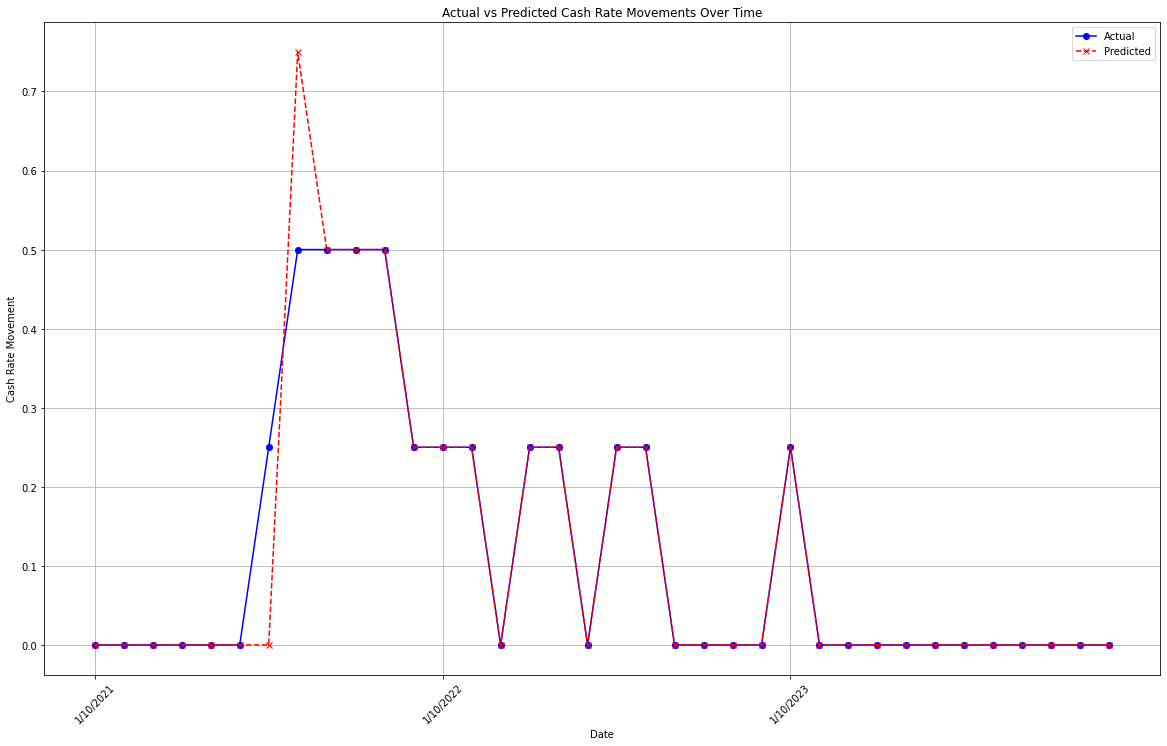

In [276]:
last_n = -36 # 3 years

dates = pd.read_csv(url_df)['Date']

# Create a time index for plotting
time_index = dates[12:]

# Create a time index for plotting
time_index = time_index[last_n:]

# Plot predictions vs actual values
plt.figure(figsize=(20, 12))
plt.plot(time_index, actual[last_n:], label='Actual', color='blue', marker='o')
plt.plot(time_index, predictions[last_n:], label='Predicted', color='red', linestyle='--', marker='x')

# Show every 12th date as an x-tick
plt.xticks(time_index[::12], rotation=45)

plt.title('Actual vs Predicted Cash Rate Movements Over Time')
plt.xlabel('Date')
plt.ylabel('Cash Rate Movement')
plt.legend()
plt.grid(True)
plt.show()

In [252]:
def walk_forward_validation_ridge(df, target_column, alpha=1, n_train=5, n_test=2):
    errors = []
    actual = []
    predictions = []
    
    # Split the dataset into inputs (X) and the target (y)
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    
    # Initialize the scaler
    scaler = StandardScaler()

    # Perform walk-forward validation
    for i in range(n_train, len(df) - n_test + 1):
        # Train on the first 'n_train' samples
        train_X, train_y = X.iloc[i-n_train:i], y.iloc[i-n_train:i]
        
        # Test on the next 'n_test' samples
        test_X, test_y = X.iloc[i:i+n_test], y.iloc[i:i+n_test]
        
        # Step 1: Scale the training and testing data
        train_X_scaled = scaler.fit_transform(train_X)
        test_X_scaled = scaler.transform(test_X)
        
        # Step 2: Fit Ridge model
        model = Ridge(alpha)
        model.fit(train_X_scaled, train_y)
        
        # Step 3: Make predictions on the test set
        y_pred = [round_to_nearest_basis_point(model.predict(test_X_scaled))]
        
        # Step 4: Calculate and store the RMSE for this test set
        rmse = np.sqrt(mean_squared_error(test_y, y_pred))
        errors.append(rmse)

        # Step 5: Append actual and predicted values for plotting later
        actual.extend(test_y.values)  # Append actual values
        predictions.extend(y_pred)    # Append predicted values
        
        # Print the progress
        # print(f'Run {i-n_train+1}: Train size: {len(train_X)}, Test size: {len(test_X)}, RMSE: {rmse:.4f}')
    
    return actual, errors, predictions

In [271]:
# Model to use for walk-forward validation
model = Ridge()

# Perform walk-forward validation
data = pd.read_csv(url_df)
data = data.drop(columns=['Date'])

alpha = 0.1

# Run the walk-forward validation
actual, errors, predictions = walk_forward_validation_ridge(data, target_column='IntRateChange', alpha=alpha, n_train=12, n_test=1)

# Print final RMSEs
print("Errors (RMSE) for each step:", errors)
print("Sum of RMSE:", sum(errors))

Errors (RMSE) for each step: [0.25, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.75, 0.5, 0.25, 0.0, 0.25, 0.25, 0.5, 0.0, 0.25, 0.25, 0.0, 0.0, 0.5, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.25, 0.0, 0.25, 0.25, 0.0, 0.25, 0.25, 0.0, 0.0, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.25, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.5, 0.25, 0.0, 0.5, 0.25, 0.0, 0.0, 0.25, 0.0, 0.5, 0.25, 0.0, 0.25, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.25, 0.0, 0.0, 0.0, 0.0, 0.25, 0.25, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.25, 0.25, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.25, 0.

In [272]:
# Calculate the proportion of matching items
matches = sum(1 for x, y in zip(actual, predictions) if x == y)
proportion_match = matches / len(predictions)

# Display the result
print(f"Proportion of matching items: {proportion_match:.2f}")

Proportion of matching items: 0.75


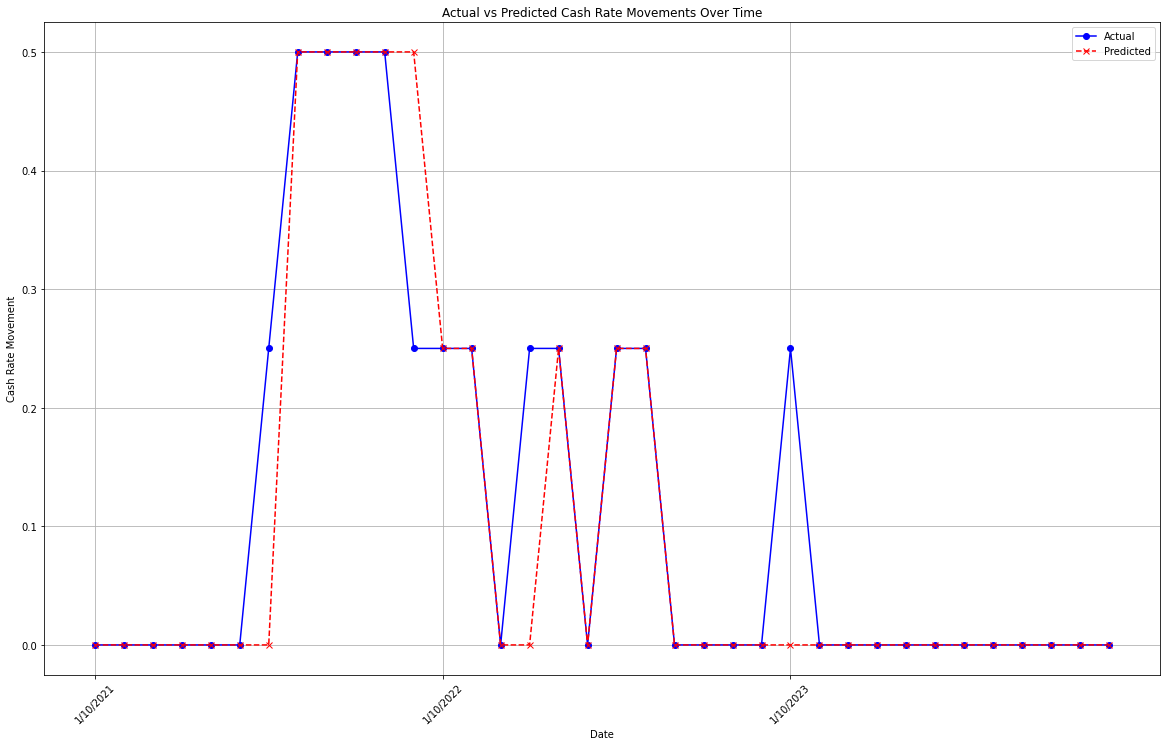

In [273]:
last_n = -36 # 3 years

dates = pd.read_csv(url_df)['Date']

# Create a time index for plotting
time_index = dates[12:]

# Create a time index for plotting
time_index = time_index[last_n:]

# Plot predictions vs actual values
plt.figure(figsize=(20, 12))
plt.plot(time_index, actual[last_n:], label='Actual', color='blue', marker='o')
plt.plot(time_index, predictions[last_n:], label='Predicted', color='red', linestyle='--', marker='x')

# Show every 12th date as an x-tick
plt.xticks(time_index[::12], rotation=45)

plt.title('Actual vs Predicted Cash Rate Movements Over Time')
plt.xlabel('Date')
plt.ylabel('Cash Rate Movement')
plt.legend()
plt.grid(True)
plt.show()

In [226]:
def walk_forward_validation_elastic_net(df, target_column, alpha=0.1, l1_ratio=0.5, n_train=5, n_test=2):
    errors = []
    actual = []
    predictions = []
    
    # Split the dataset into inputs (X) and the target (y)
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    
    # Initialize the scaler
    scaler = StandardScaler()

    # Perform walk-forward validation
    for i in range(n_train, len(df) - n_test + 1):
        # Train on the first 'n_train' samples
        train_X, train_y = X.iloc[i-n_train:i], y.iloc[i-n_train:i]
        
        # Test on the next 'n_test' samples
        test_X, test_y = X.iloc[i:i+n_test], y.iloc[i:i+n_test]
        
        # Step 1: Scale the training and testing data
        train_X_scaled = scaler.fit_transform(train_X)
        test_X_scaled = scaler.transform(test_X)
        
        # Step 2: Fit ElasticNet model
        elastic_net = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
        elastic_net.fit(train_X_scaled, train_y)
        
        # Step 3: Make predictions on the test set
        y_pred = [round_to_nearest_basis_point(elastic_net.predict(test_X_scaled))]
        
        # Step 4: Calculate and store the RMSE for this test set
        rmse = np.sqrt(mean_squared_error(test_y, y_pred))
        errors.append(rmse)

        # Step 5: Append actual and predicted values for plotting later
        actual.extend(test_y.values)  # Append actual values
        predictions.extend(y_pred)    # Append predicted values
        
        # Print the progress
        # print(f'Run {i-n_train+1}: Train size: {len(train_X)}, Test size: {len(test_X)}, RMSE: {rmse:.4f}')
    
    return actual, errors, predictions

In [227]:
# Model to use for walk-forward validation
model = ElasticNet()

# Perform walk-forward validation
data = pd.read_csv(url_df)
data = data.drop(columns=['Date'])

# Perform walk-forward validation using ElasticNet
alpha = 0.01  # Regularization strength
l1_ratio = 0.5  # Mixing ratio between Lasso and Ridge

# Run the walk-forward validation
actual, errors, predictions = walk_forward_validation_elastic_net(data, target_column='IntRateChange', alpha=alpha, l1_ratio=l1_ratio, n_train=12, n_test=1)

# Print final RMSEs
print("Errors (RMSE) for each step:", errors)
print("Sum of RMSE:", sum(errors))

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

Errors (RMSE) for each step: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.75, 0.25, 0.25, 0.25, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

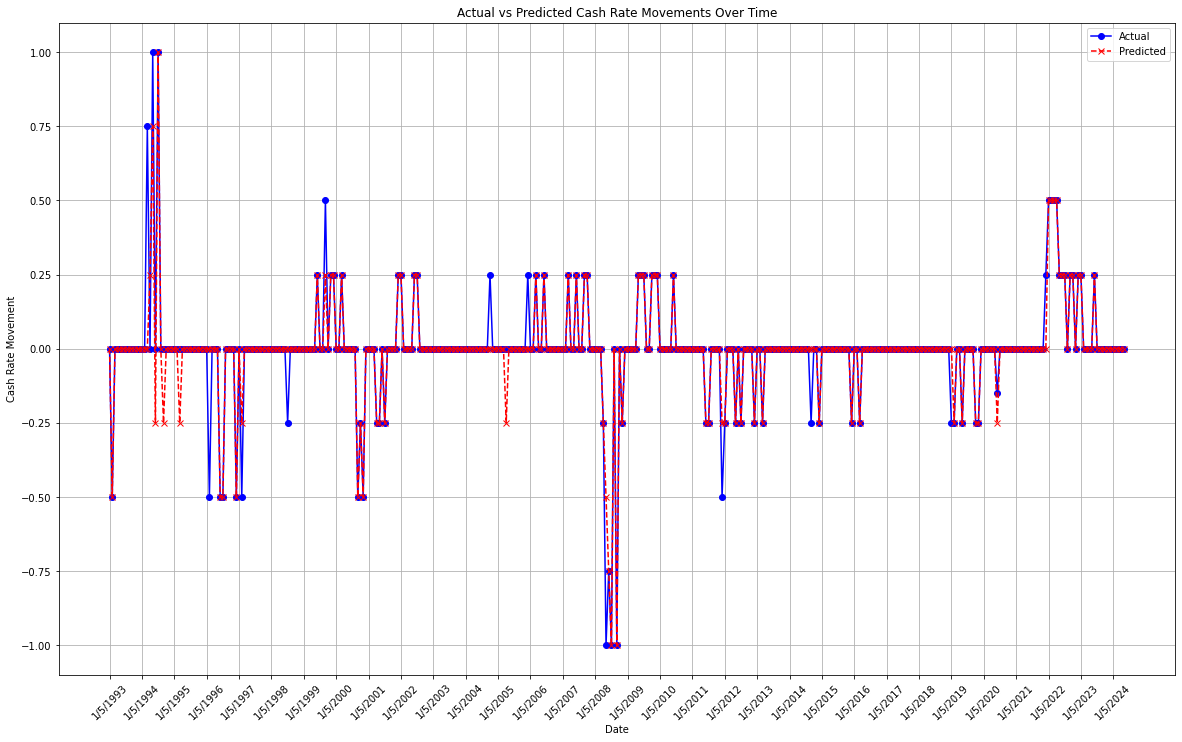

In [228]:
dates = pd.read_csv(url_df)['Date']

# Create a time index for plotting
time_index = dates[12:]

# Plot predictions vs actual values
plt.figure(figsize=(20, 12))
plt.plot(time_index, actual, label='Actual', color='blue', marker='o')
plt.plot(time_index, predictions, label='Predicted', color='red', linestyle='--', marker='x')

# Show every 12th date as an x-tick
plt.xticks(time_index[::12], rotation=45)

plt.title('Actual vs Predicted Cash Rate Movements Over Time')
plt.xlabel('Date')
plt.ylabel('Cash Rate Movement')
plt.legend()
plt.grid(True)
plt.show()

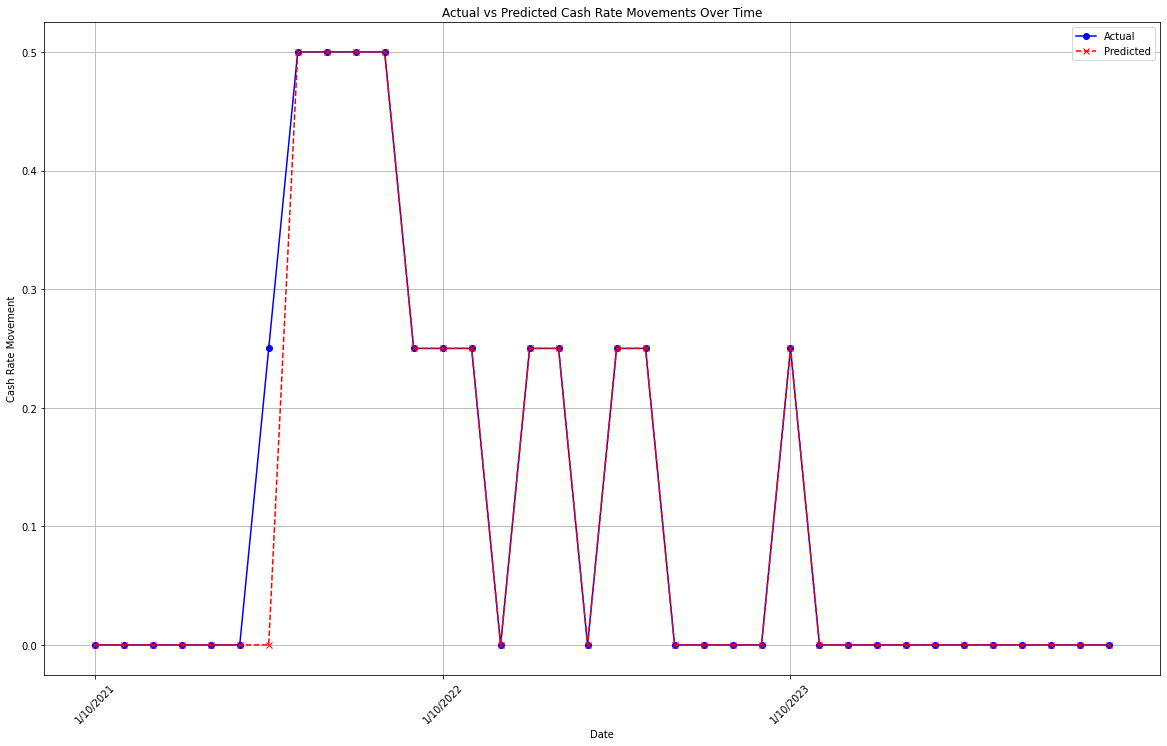

In [229]:
last_n = -36 # 3 years

dates = pd.read_csv(url_df)['Date']

# Create a time index for plotting
time_index = dates[12:]

# Create a time index for plotting
time_index = time_index[last_n:]

# Plot predictions vs actual values
plt.figure(figsize=(20, 12))
plt.plot(time_index, actual[last_n:], label='Actual', color='blue', marker='o')
plt.plot(time_index, predictions[last_n:], label='Predicted', color='red', linestyle='--', marker='x')

# Show every 12th date as an x-tick
plt.xticks(time_index[::12], rotation=45)

plt.title('Actual vs Predicted Cash Rate Movements Over Time')
plt.xlabel('Date')
plt.ylabel('Cash Rate Movement')
plt.legend()
plt.grid(True)
plt.show()

In [230]:
# Calculate the proportion of matching items
matches = sum(1 for x, y in zip(actual, predictions) if x == y)
proportion_match = matches / len(predictions)

# Display the result
print(f"Proportion of matching items: {proportion_match:.2f}")

Proportion of matching items: 0.95


In [231]:
def walk_forward_validation_elastic_net_poly(df, target_column, alpha=0.1, l1_ratio=0.5, n_train=5, n_test=2):

    errors = []
    actual = []
    predictions = []
    
    # Split the dataset into inputs (X) and the target (y)
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    
    # Initialize the scaler
    scaler = StandardScaler()
    poly = PolynomialFeatures(degree=2, include_bias=False)

    # Perform walk-forward validation
    for i in range(n_train, len(df) - n_test + 1):
        # Train on the first 'n_train' samples
        train_X, train_y = X.iloc[i-n_train:i], y.iloc[i-n_train:i]
        
        # Test on the next 'n_test' samples
        test_X, test_y = X.iloc[i:i+n_test], y.iloc[i:i+n_test]
        
        # Step 1: Scale the training and testing data
        X_poly_train = poly.fit_transform(train_X)
        X_poly_test = poly.fit_transform(test_X)
        
        train_X_scaled = scaler.fit_transform(X_poly_train)
        test_X_scaled = scaler.transform(X_poly_test)
        
        # Step 2: Fit ElasticNet model
        elastic_net = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
        elastic_net.fit(train_X_scaled, train_y)
        
        # Step 3: Make predictions on the test set
        y_pred = [round_to_nearest_basis_point(elastic_net.predict(test_X_scaled))]
        
        # Step 4: Calculate and store the RMSE for this test set
        rmse = np.sqrt(mean_squared_error(test_y, y_pred))
        errors.append(rmse)

        # Step 5: Append actual and predicted values for plotting later
        actual.extend(test_y.values)  # Append actual values
        predictions.extend(y_pred)    # Append predicted values
        
        # Print the progress
        # print(f'Run {i-n_train+1}: Train size: {len(train_X)}, Test size: {len(test_X)}, RMSE: {rmse:.4f}')
    
    return actual, errors, predictions

In [232]:
# Model to use for walk-forward validation
model = ElasticNet()

# Perform walk-forward validation
data = pd.read_csv(url_df)
data = data.drop(columns=['Date'])

# Perform walk-forward validation using ElasticNet
alpha = 0.01  # Regularization strength
l1_ratio = 0.5  # Mixing ratio between Lasso and Ridge

# Run the walk-forward validation
actual, errors, predictions = walk_forward_validation_elastic_net_poly(data, target_column='IntRateChange', alpha=alpha, l1_ratio=l1_ratio, n_train=12, n_test=1)

# Print final RMSEs
print("Errors (RMSE) for each step:", errors)
print("Sum of RMSE:", sum(errors))

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.091e-04, tolerance: 6.823e-05
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.084e-04, tolerance: 6.823e-05
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

Errors (RMSE) for each step: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.75, 0.25, 0.25, 0.25, 0.25, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.25, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.751e-05, tolerance: 5.729e-06
  model = cd_fast.enet_coordinate_descent(


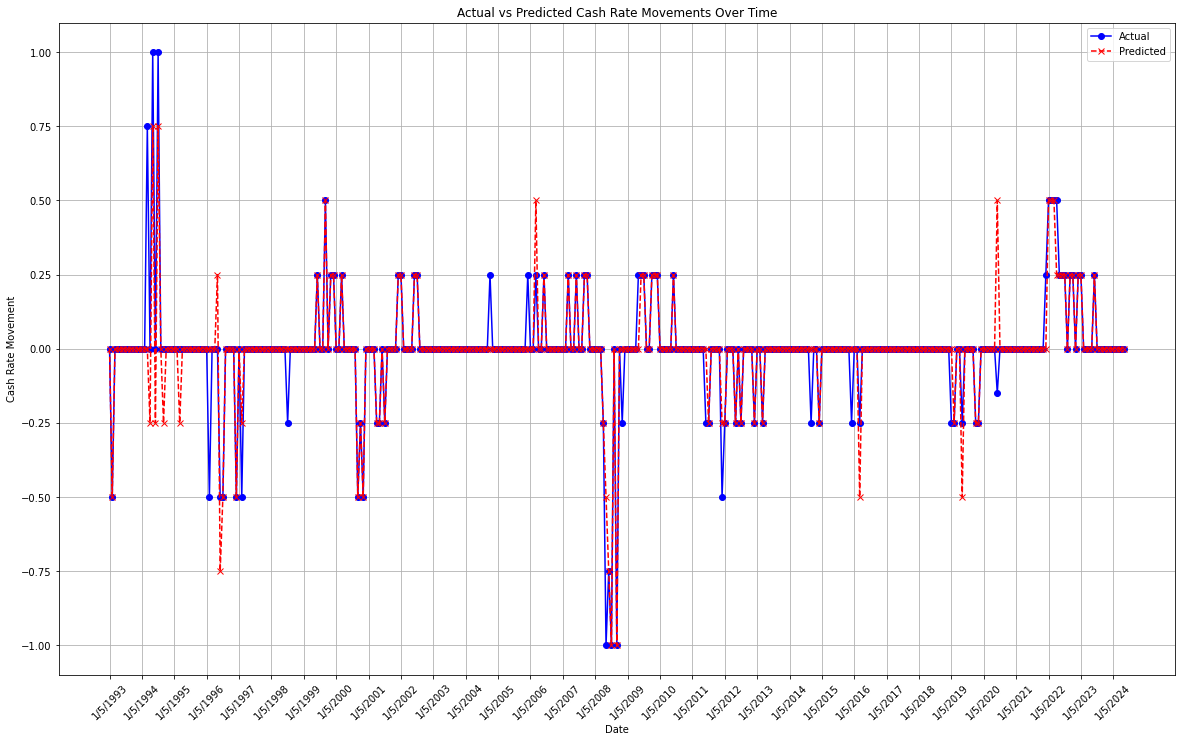

In [233]:
dates = pd.read_csv('Data_NEW.csv')['Date']

# Create a time index for plotting
time_index = dates[12:]

# Plot predictions vs actual values
plt.figure(figsize=(20, 12))
plt.plot(time_index, actual, label='Actual', color='blue', marker='o')
plt.plot(time_index, predictions, label='Predicted', color='red', linestyle='--', marker='x')

# Show every 12th date as an x-tick
plt.xticks(time_index[::12], rotation=45)

plt.title('Actual vs Predicted Cash Rate Movements Over Time')
plt.xlabel('Date')
plt.ylabel('Cash Rate Movement')
plt.legend()
plt.grid(True)
plt.show()

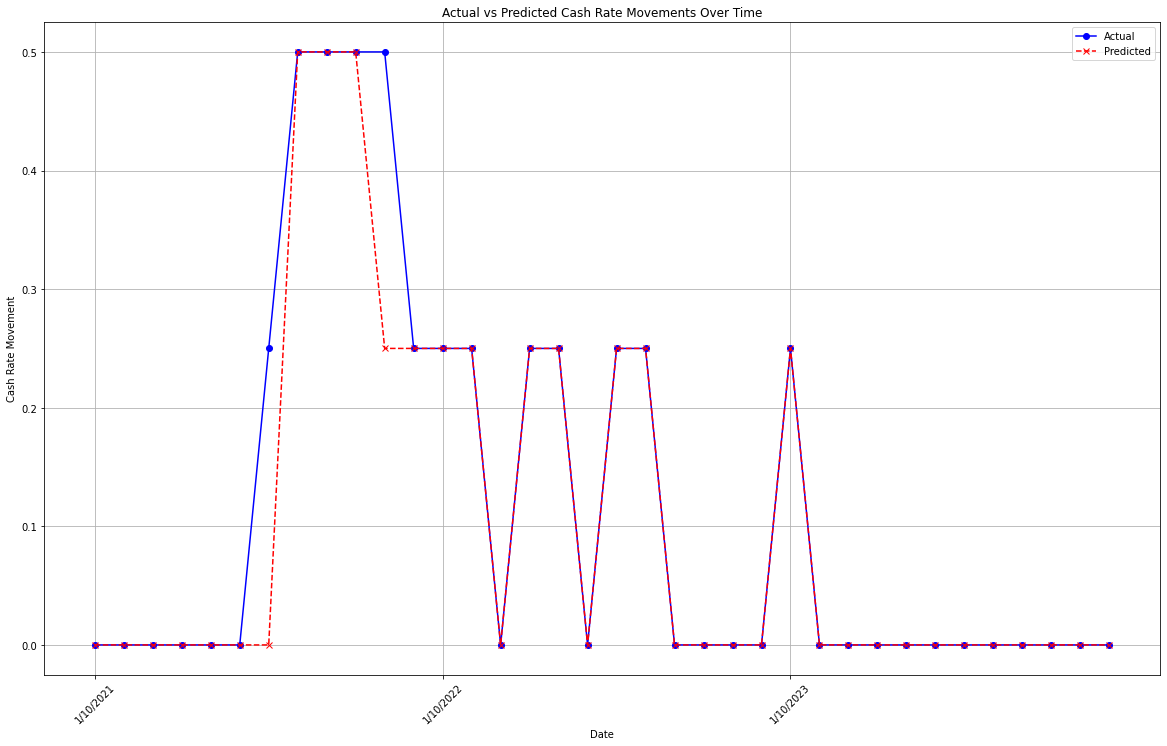

In [234]:
last_n = -36 # 3 years

dates = pd.read_csv(url_df)['Date']

# Create a time index for plotting
time_index = dates[12:]

# Create a time index for plotting
time_index = time_index[last_n:]

# Plot predictions vs actual values
plt.figure(figsize=(20, 12))
plt.plot(time_index, actual[last_n:], label='Actual', color='blue', marker='o')
plt.plot(time_index, predictions[last_n:], label='Predicted', color='red', linestyle='--', marker='x')

# Show every 12th date as an x-tick
plt.xticks(time_index[::12], rotation=45)

plt.title('Actual vs Predicted Cash Rate Movements Over Time')
plt.xlabel('Date')
plt.ylabel('Cash Rate Movement')
plt.legend()
plt.grid(True)
plt.show()

In [235]:
# Calculate the proportion of matching items
matches = sum(1 for x, y in zip(actual, predictions) if x == y)
proportion_match = matches / len(predictions)

# Display the result
print(f"Proportion of matching items: {proportion_match:.2f}")

Proportion of matching items: 0.93
